<h1>Problem set 1</h1>
<p><b>Sergio Villamarin</b></p>

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

<h3>P1</h3>
<p>The set of defining equations for this problem are:</p>

$$q_s(x,0)=q_s(x)=q_{s_0}+a\eta(x)$$
$$\eta(x,0)=b\sin(kx)$$
$$\frac{\partial \eta}{\partial t}=-\frac{1}{\varepsilon_0}\frac{\partial q_s}{\partial x}$$

#### 1.1
Since $\eta $ is the bed elevation with respect to a datum, the value of $b$ corresponds to the amplitude of the $\sin$ wave that defines the bed. Similarly, $k$ will affect the frequency of the wave shape as $f=2\pi k$, i.e. it makes dunes more spiky or flat. 


#### 1.2
From the three defining equations we can find a closed expresion for $\frac{\partial \eta}{\partial t}$

$$
\begin{align*}
    \frac{\partial \eta}{\partial t}(x,0)&=-\frac{1}{\varepsilon_0}\frac{\partial q_s}{\partial x}(x,0)\\
    &=-\frac{1}{\varepsilon_0}\frac{\partial}{\partial x}\left(q_{s_0}+a\eta\right)(x,0) \\
    &=-\frac{a}{\varepsilon_0}\frac{\partial \eta}{\partial x}(x,0) \\
    &=-\frac{a}{\varepsilon_0}\frac{\partial}{\partial x}\left( b\sin(kx) \right)\\
    &=-\frac{a}{\varepsilon_0}bk\cos(kx)    
\end{align*}
$$

#### 1.3
Since we want the bed elevation evolution we want a time differential for $q_s$, so we do

$$
\begin{align*}
    \frac{\partial q_s}{\partial t}(x,0)&=\frac{\partial}{\partial t}\left(q_{s_0}+a\eta\right)(x,0) \\
    &=a\frac{\partial \eta}{\partial t}(x,0) \\
    &=-\frac{a^2}{\varepsilon_0}bk\cos(kx) \\
\end{align*}
$$

Using euler's method to solve in the time dimension at $t=0$ we get
$$
\begin{align*}
    q_s(x,0+\Delta t)&\approx q_s(x,0)+\Delta t \frac{\partial q_s}{\partial t}(x,0)\\
    &=q_{s_0}+a\eta(x,0)-\Delta t\frac{a^2}{\varepsilon_0}bk\cos(kx) \\
    &=q_{s_0}+ab\sin(kx)-\Delta t\frac{a^2bk}{\varepsilon_0}\cos(kx)
\end{align*}
$$

Actually, ignore all that, I mixed up the sediment flow and the bed, but I feel bad about erasing it. From part 1.2 we have the time differential so we can apply euler's method as well

$$
\begin{align*}
    \eta(x,0+\Delta t)&\approx \eta(x,0)+\Delta t \frac{\partial \eta}{\partial t}(x,0)\\
    &=b\sin(kx)-\Delta t\frac{a}{\varepsilon_0}bk\cos(kx)
\end{align*}
$$

In [2]:
#sediment flow parameters
q0=0.22; a=1.1; 
#bed shape parameters
b=0.2; k=2.0; eps=0.5; #bed porosity not given so I'll assume 0.5
#space domain
xdelta=0.1;
start=0.0; end=4.0;
x=np.arange(start, end+xdelta,xdelta)
#time domain
tdelta=[0.05,0.1,0.15]

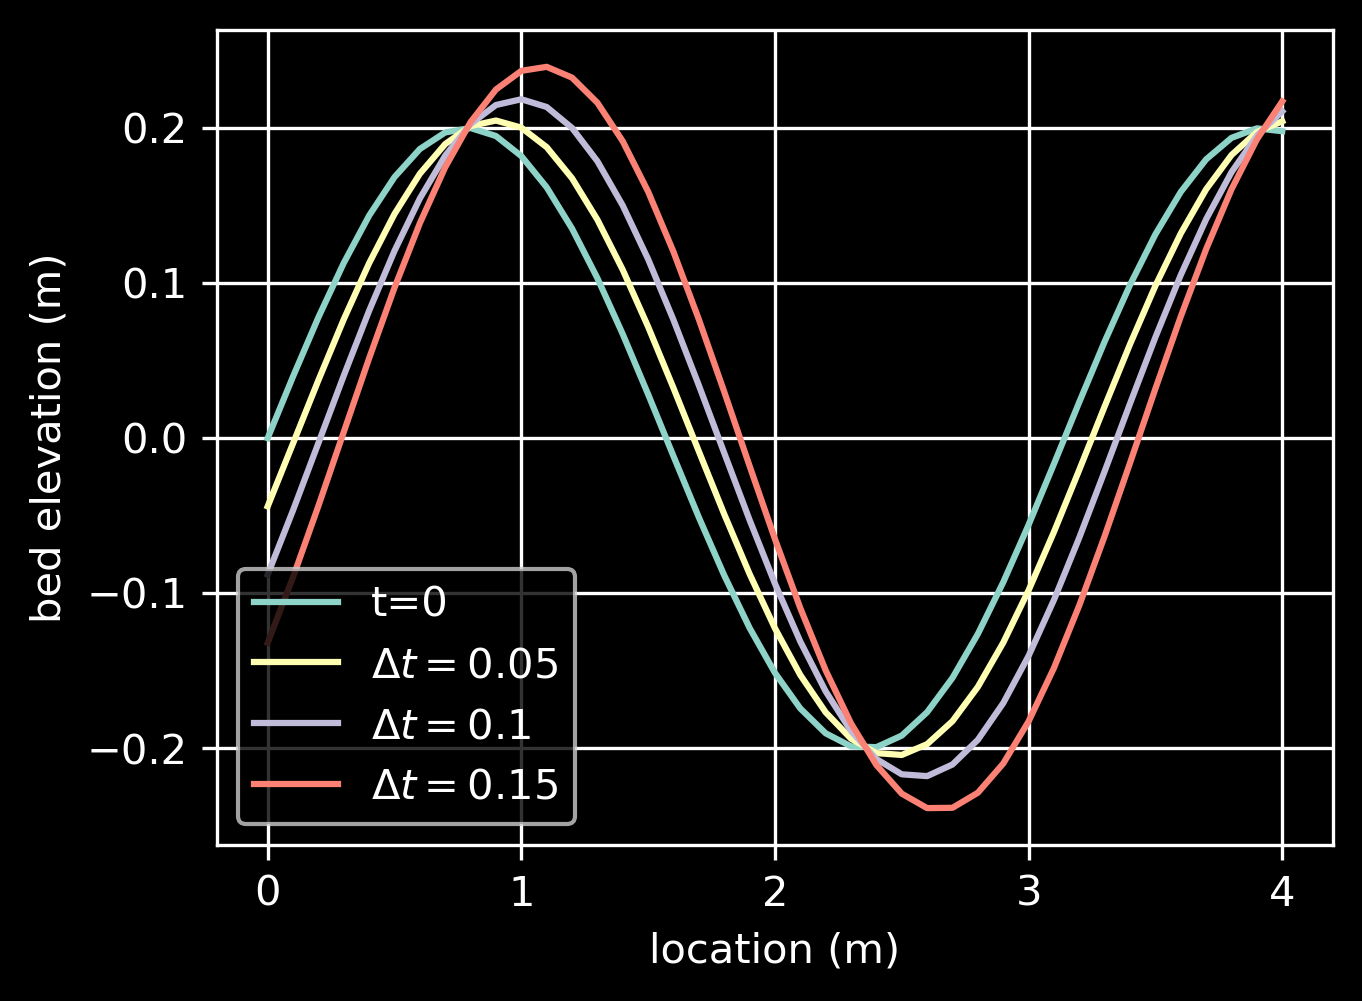

In [15]:
#setup
n=[];
fig, ax= plt.subplots(figsize=[4.8, 3.6],dpi=300);
plt.style.use("dark_background");
# initial conditions plot
n.append(b*np.sin(k*x));
ax.plot(x,n[0],label="t=0");
# different time delta plots
for i in range(len(tdelta)):
    n.append( b*np.sin(k*x)-tdelta[i]*(a*b*k/eps)*np.cos(k*x) );
    ax.plot(x,n[i+1],label="$\Delta t=$"+str(tdelta[i]));
# style of the plot
ax.set_xlabel("location (m)");
ax.set_ylabel("bed elevation (m)");
ax.legend();
ax.grid(True);
plt.show();


#### 1.4
I can't do a sketch here... but I can do this. Call the new function $q_2(x,t)$ and its corresponding bed elevation $\eta_2$. Then we want to relate the original sediment flux and dynamics to the new ones.

Then the system defined equations are:

$$q_2(x,0)=q_2(x)=q_{s_0}+a\eta_2(x-l)=q_2(x-l)=q_s(x-l,0)$$
$$\eta_2(x,0)=b\sin(kx)$$
$$\frac{\partial \eta_2}{\partial t}=-\frac{1}{\varepsilon_0}\frac{\partial q_2}{\partial x}$$

from the last relationship and the original Exner equation we get  
$$
\begin{align*}
    \frac{\partial \eta_2}{\partial t}(x,0)&=-\frac{1}{\varepsilon_0}\frac{\partial q_2}{\partial x}(x,0) \\
    &=-\frac{1}{\varepsilon_0}\frac{\partial q_s}{\partial x}(x-l,0) \\
    &=\frac{\partial \eta}{\partial t}(x-l,0) \\
    &=\frac{\partial \eta_2}{\partial t}(x-l,0)
\end{align*}
$$

#### 1.4
Translations don't change slopes, i.e. they don't change derivatives, meaning that the only change in the original defining equations is a lag that displaces the bed but the flux acts as if it was acting on the elevation at $l$ meters to the right (positive direction) of the current location. We can see this on the next code that shifts the derivative terms by $l=1$.

In [16]:
#sediment flow parameters
q0=0.22; a=1.1;
#bed shape parameters
b=0.2; k=2.0; l=1; eps=0.5; #bed porosity not given so I'll assume 0.5
#space domain
xdelta=0.1;
start=0.0; end=4.0;
x=np.arange(start, end+xdelta,xdelta)
#time domain
tdelta=[0.05,0.1,0.15]

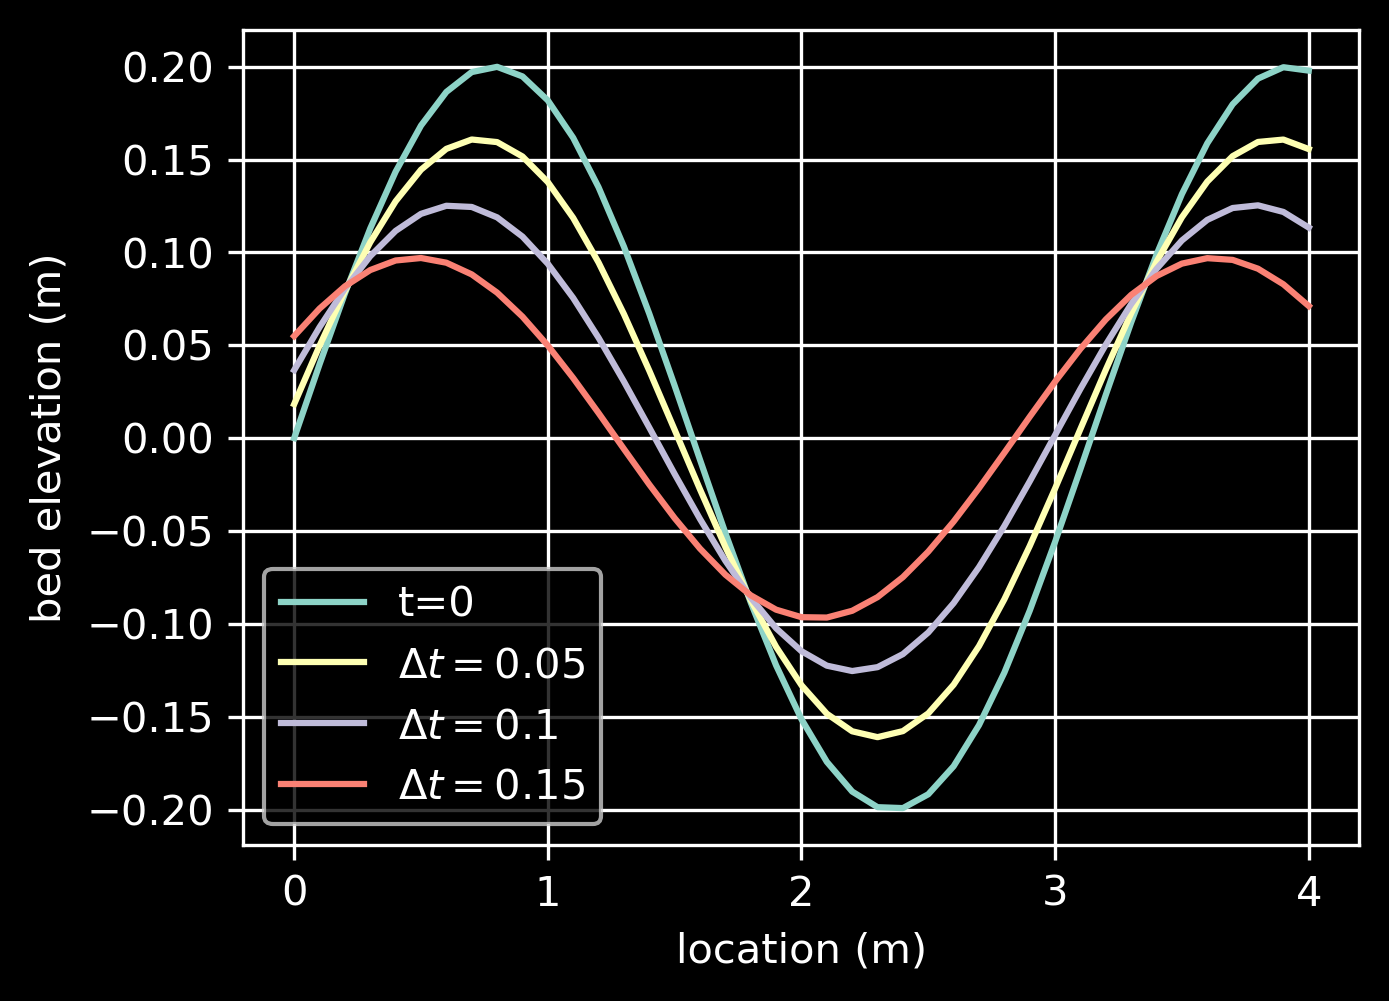

In [19]:
#setup
n=[];
fig, ax= plt.subplots(figsize=[4.8, 3.6],dpi=300);
plt.style.use("dark_background");
# initial conditions plot
n.append(b*np.sin(k*(x)));
ax.plot(x,n[0],label="t=0");
# different time delta plots
for i in range(len(tdelta)):
    n.append( b*np.sin(k*(x))-tdelta[i]*(a*b*k/eps)*np.cos(k*(x-l)) );
    ax.plot(x,n[i+1],label="$\Delta t=$"+str(tdelta[i]));
# style of the plot
ax.set_xlabel("location (m)");
ax.set_ylabel("bed elevation (m)");
ax.legend();
ax.grid(True);
plt.show();
